### CITS5508 labsheet 5

Sample code showing how to read the CIFAR-10 data. Only cells 1 and 2 are needed. **Note: For the code to work, all the data batch files should be in the same directory with this Notebook file.**

This is only an example. Students should put in their own markdown cells. 

Rather than looking at the code in the file **<i>data_loader.py</i>**, description about the `DataLoader` class in the file can be viewed using **<i>pydoc</i>**. Try typing the following command in a terminal window (assuming that *data_loader.py* is in the current directory):<br>
<tt>
&nbsp; &nbsp; pydoc data_loader
</tt>

To convert this file into **<i>lab05-sample.py</i>**, a Python script file, for running on **Kaya** (the UWA GPU computer), do the following:
* If you are using Jupyter-lab, then select **File $>$ Export Notebook As... $>$ Executable Script $>$**. In the popped up window, select **Save File** and click the **OK** button.
* If you are using **Jupyter-notebook**, then select **File $>$ Download as $>$ Python (.py)**. Note that the option **Python (.py)** might be hidden. You would need to scroll down the list to see it. In the popped up window, select **Save File** and click the **OK** button.

**Author: Du Huynh**<br>
**Date: April 2021**

#### Step 1: Import the `DataLoader` class

In [91]:
from data_loader import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
import pandas as pd

#### Step 2: Call the `load_batch` function

In [6]:
# According to the CIFAR-10 website, the training set is split into five batches
# stored in fives files. Each colour image has dimensions equal to 32 x 32 x 3. There
# are 10 classes.
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# The default values of all the arguments of the load_batch function have been
# set for the CIFAR-10 dataset.
X_ori, y_ori = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)

#### Step 3. A quick inspection of the outputs from the `load_batch` function

In [3]:
# You need to split the training set to form a validation set. The original
# training set would become smaller.

In [10]:
print('X_test.shape =', X_ori.shape, 'data type:', X_ori.dtype)
print('y_test.shape =', y_ori.shape, 'data type:', y_ori.dtype)

X_test.shape = (50000, 32, 32, 3) data type: float32
y_test.shape = (50000,) data type: uint8


In [7]:
print('X_test.shape =', X_test.shape, 'data type:', X_test.dtype)
print('y_test.shape =', y_test.shape, 'data type:', y_test.dtype)

X_test.shape = (10000, 32, 32, 3) data type: float32
y_test.shape = (10000,) data type: uint8


In [8]:
x_train,x_validation,y_train,y_validation = train_test_split(X_ori, y_ori, test_size=0.15, random_state=0)


In [75]:
print('X_test.shape =', x_train.shape, 'data type:', x_train.dtype)
print('X_test.shape =', y_train.shape, 'data type:', y_train.dtype)
print(len(x_train))

X_test.shape = (42500, 32, 32, 3) data type: float32
X_test.shape = (42500,) data type: uint8
42500


For train set: 


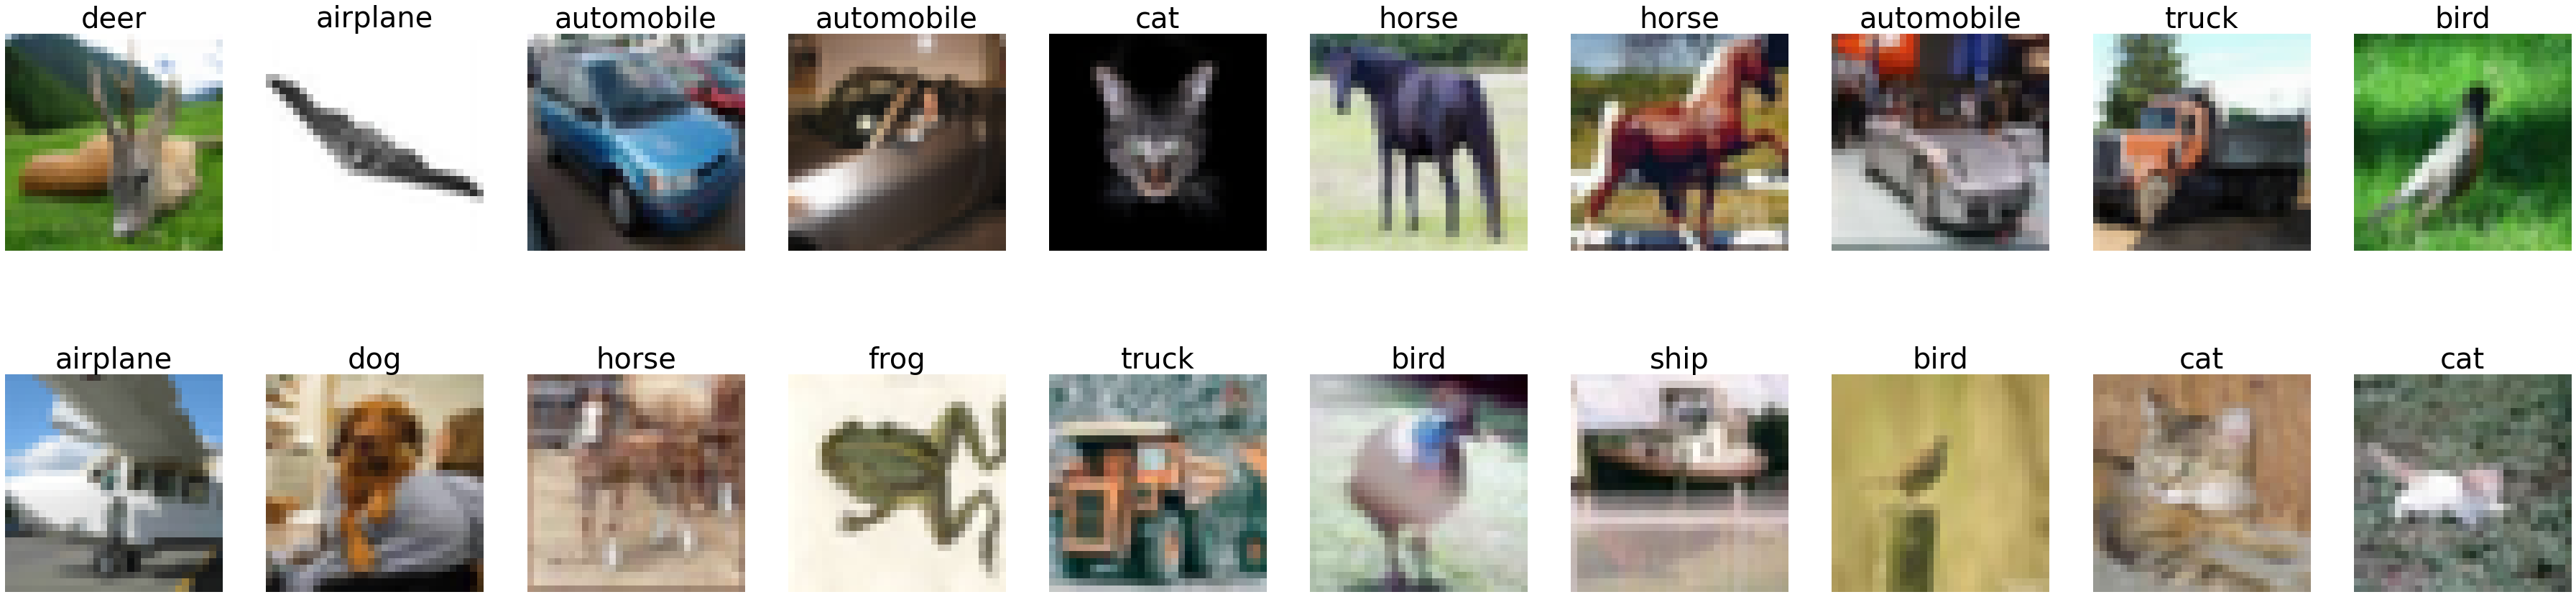

For validation set: 


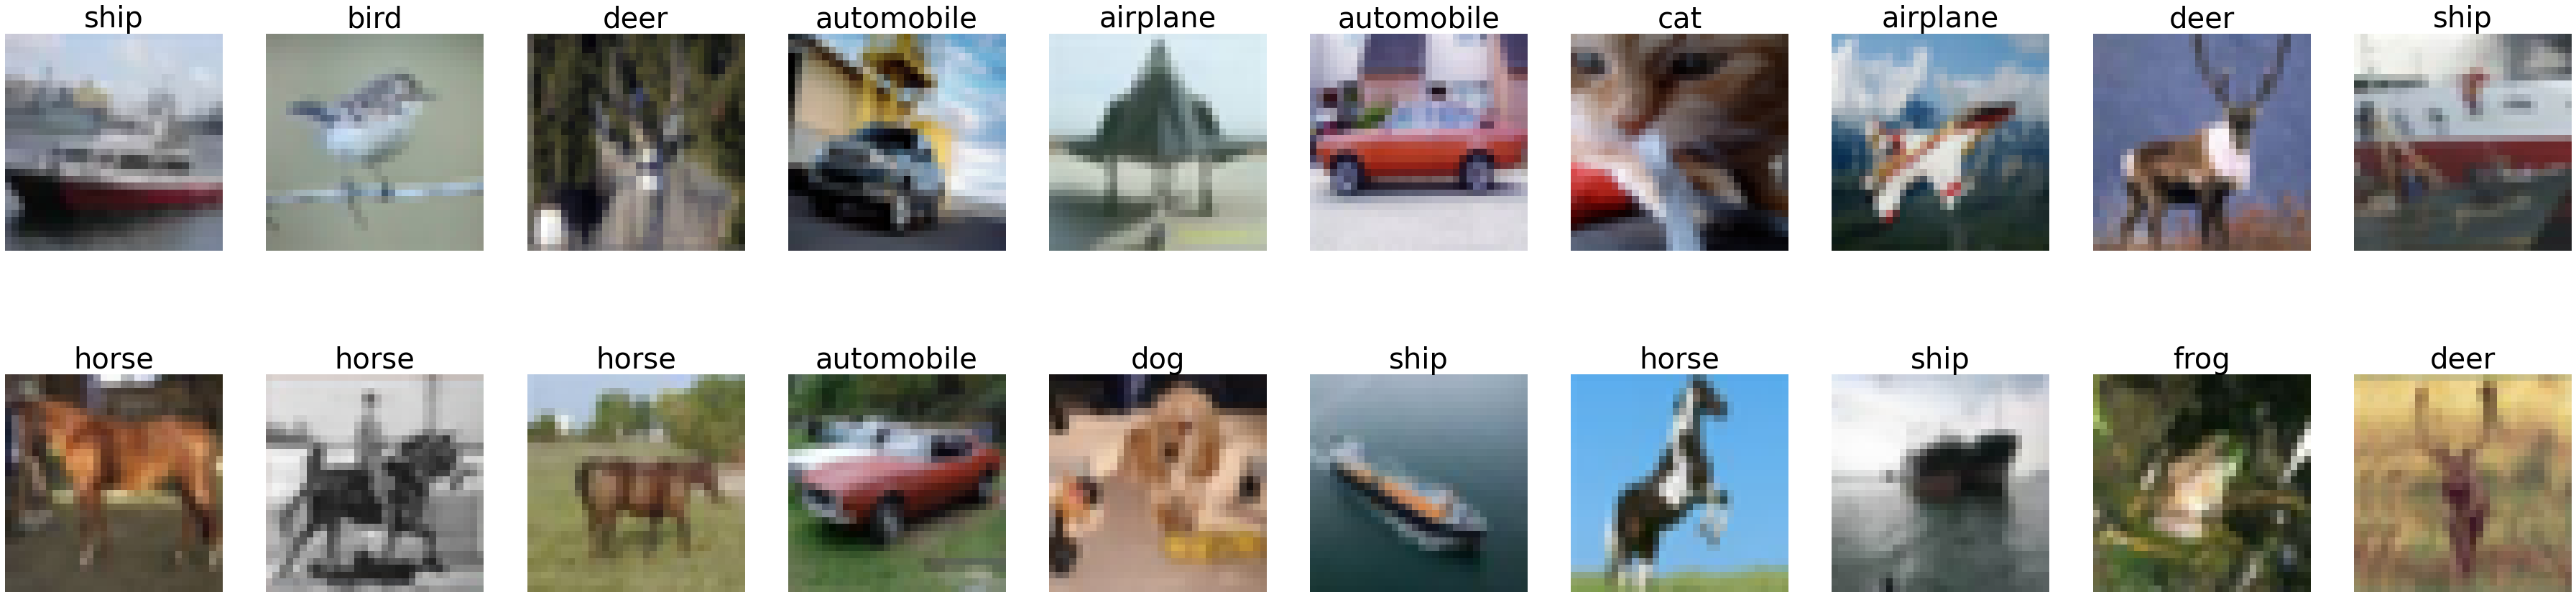

For test set: 


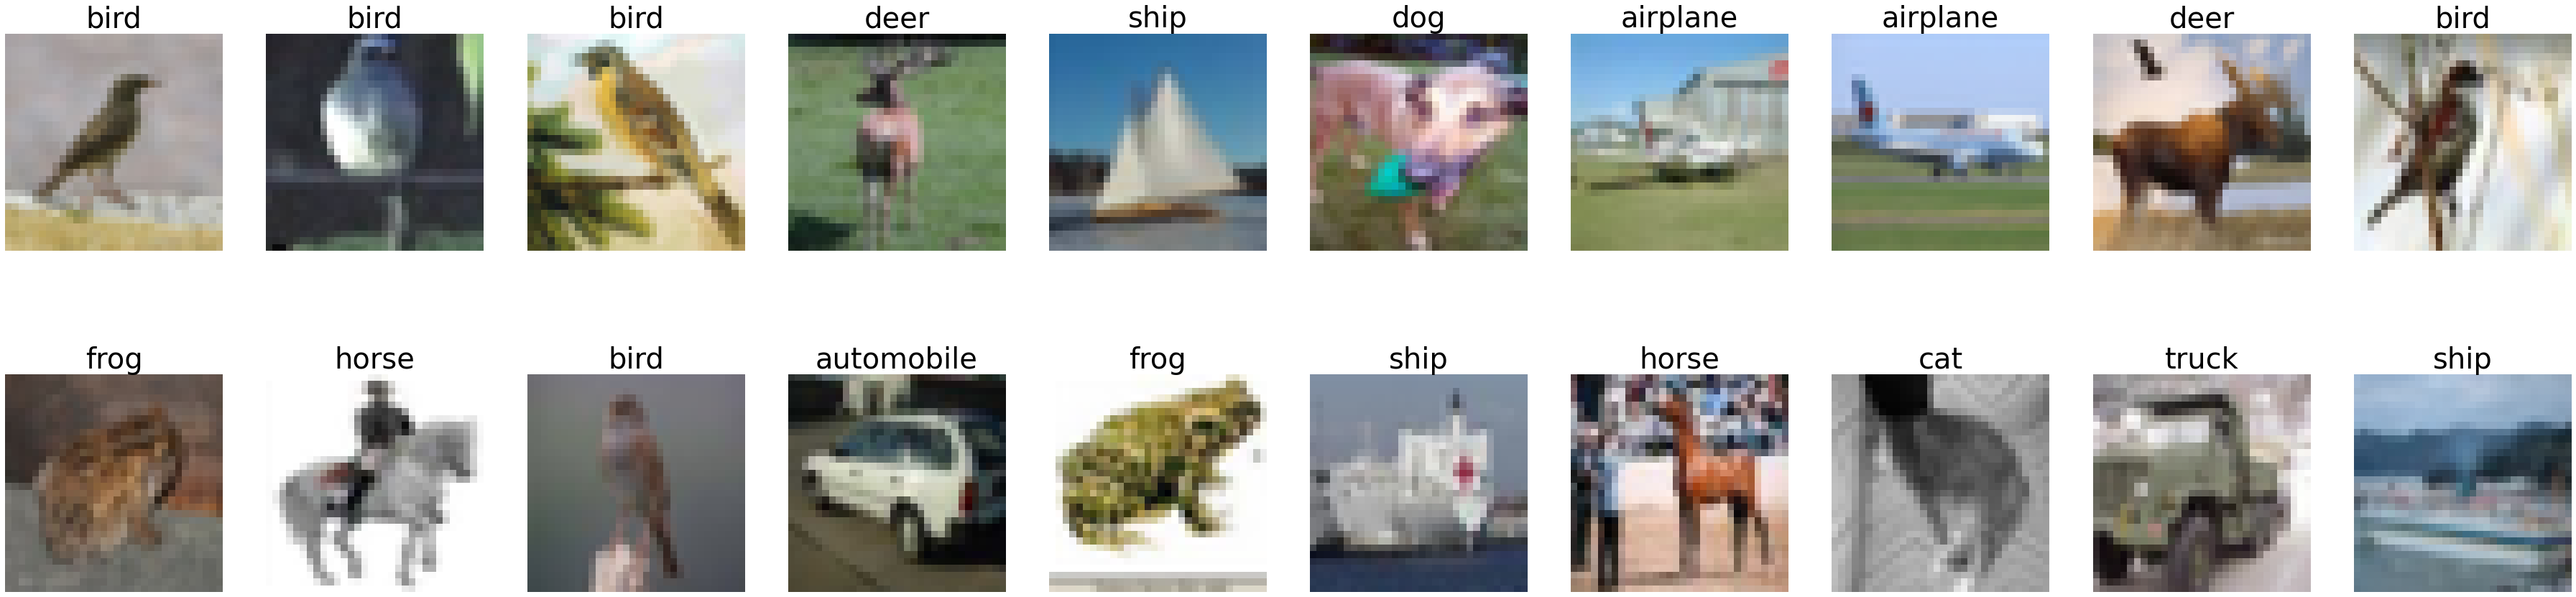

In [78]:
def displaySampleImage(x_set,y_set):
    plt.figure(figsize=(64,16))
    nameList=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    rdIndex=random.sample(range(0,len(x_set)-1),20)
    plotNum=0
    for i in rdIndex:
        plt.subplot(2,10,plotNum+1)
        plt.axis('off')
        plt.title(nameList[y_set[i]],fontsize=40)
        plt.imshow(x_set[i])
        plotNum=plotNum+1
    plt.show()

print("For train set: ")
displaySampleImage(x_train,y_train)
print("For validation set: ")
displaySampleImage(x_validation,y_validation)
print("For test set: ")
displaySampleImage(X_test,y_test)


In [ ]:
classifier = MLPClassifier(solver='lbfgs', activation='logistic', 
                           hidden_layer_sizes=(3, ), random_state=20)

In [82]:
tf.__version__
keras.__version__

'2.4.0'

In [86]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))# 1 neurons per class, total 10 classes
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               921900    
_________________________________________________________________
dense_5 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 1,003,210
Trainable params: 1,003,210
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [89]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_validation,y_validation))

Epoch 1/10
1329/1329 [==============================] - 6s 4ms/step - loss: 1.5288 - accuracy: 0.4572 - val_loss: 1.6343 - val_accuracy: 0.4176
Epoch 2/10
1329/1329 [==============================] - 6s 4ms/step - loss: 1.4911 - accuracy: 0.4692 - val_loss: 2.5437 - val_accuracy: 0.2268
Epoch 3/10
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4587 - accuracy: 0.4852 - val_loss: 1.5553 - val_accuracy: 0.4441
Epoch 4/10
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4291 - accuracy: 0.4919 - val_loss: 1.5402 - val_accuracy: 0.4475
Epoch 5/10
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4024 - accuracy: 0.5011 - val_loss: 1.7294 - val_accuracy: 0.3963
Epoch 6/10
1329/1329 [==============================] - 6s 4ms/step - loss: 1.3760 - accuracy: 0.5114 - val_loss: 2.1204 - val_accuracy: 0.2991
Epoch 7/10
1329/1329 [==============================] - 5s 4ms/step - loss: 1.3509 - accuracy: 0.5223 - val_loss: 1.6475 - val_accuracy:

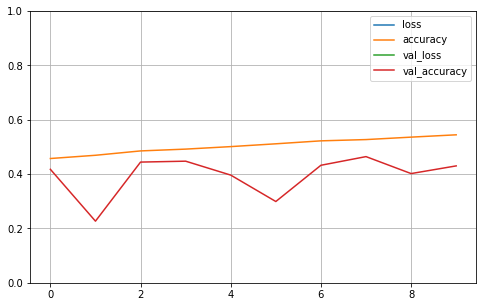

In [92]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [93]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5919 - accuracy: 0.4378


[1.5918916463851929, 0.43779999017715454]

In [95]:
model.save("mlp_keras_model")
model=keras.models.load_model("mlp_keras_model")

INFO:tensorflow:Assets written to: mlp_keras_model\assets


In [97]:
model= keras.models.Sequential([
    keras.layers.Conv2D(64,7,activation="relu",padding="same",input_shape=[32,32,3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,3,activation="relu",padding="same"),
    keras.layers.Conv2D(128,3,activation="relu",padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation="relu",padding="same"),
    keras.layers.Conv2D(256,3,activation="relu",padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="softmax"),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        9472      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 256)        

In [98]:
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [99]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_validation,y_validation))

Epoch 1/10
1329/1329 [==============================] - 254s 191ms/step - loss: 2.2722 - accuracy: 0.1352 - val_loss: 2.0496 - val_accuracy: 0.2532
Epoch 2/10
1329/1329 [==============================] - 260s 196ms/step - loss: 2.0929 - accuracy: 0.2167 - val_loss: 1.8989 - val_accuracy: 0.3020
Epoch 3/10
1329/1329 [==============================] - 249s 187ms/step - loss: 1.9064 - accuracy: 0.2915 - val_loss: 2.8084 - val_accuracy: 0.1631
Epoch 4/10
1329/1329 [==============================] - 248s 187ms/step - loss: 1.7726 - accuracy: 0.3476 - val_loss: 1.6186 - val_accuracy: 0.4160
Epoch 5/10
1329/1329 [==============================] - 225s 169ms/step - loss: 1.6685 - accuracy: 0.3908 - val_loss: 1.5354 - val_accuracy: 0.4311
Epoch 6/10
1329/1329 [==============================] - 224s 169ms/step - loss: 1.5916 - accuracy: 0.4206 - val_loss: 1.4375 - val_accuracy: 0.4816
Epoch 7/10
1329/1329 [==============================] - 224s 169ms/step - loss: 1.5278 - accuracy: 0.4475 - val_